In [1]:
#http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
# Importing required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth,association_rules

import warnings 
warnings.filterwarnings("ignore")

In [2]:
crop_folder=r'Cropped'


In [3]:
grocery_items = pd.read_csv("Grocery_Items_14.csv")
grocery_items.head()

,0,1,2,3,4,5,6,7,8,9,10
0,citrus fruit,frozen meals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,brown bread,rolls/buns,cat food,pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dessert,whole milk,waffles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,soda,frozen potato products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,frozen vegetables,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
grocery_df=grocery_items.apply(lambda x: x.dropna().to_list(), axis=1)


In [5]:
te = TransactionEncoder()
te_ary = te.fit(grocery_df).transform(grocery_df)
grocery_df = pd.DataFrame(te_ary, columns=te.columns_)
grocery_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7996,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
itemsets = apriori(grocery_df, min_support=0.01, use_colnames=True)
association_rules(itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(soda),(other vegetables),0.097250,0.121250,0.010250,0.105398,0.869266,-0.001542,0.982281
1,(other vegetables),(whole milk),0.121250,0.157875,0.014625,0.120619,0.764013,-0.004517,0.957633
2,(rolls/buns),(whole milk),0.109625,0.157875,0.014500,0.132269,0.837809,-0.002807,0.970491
3,(soda),(whole milk),0.097250,0.157875,0.011125,0.114396,0.724598,-0.004228,0.950905
4,(yogurt),(whole milk),0.085750,0.157875,0.011625,0.135569,0.858708,-0.001913,0.974195


<AxesSubplot:xlabel='msv', ylabel='mct'>

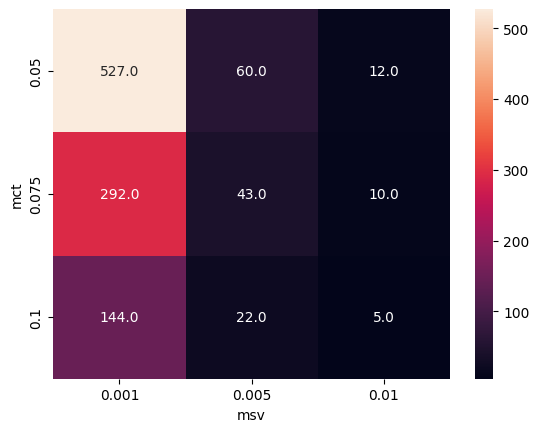

In [7]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
min_support = [0.001, 0.005, 0.01]
min_conf = [0.05, 0.075, 0.1]
data = pd.DataFrame(columns=['msv', 'mct', 'count'])
for i in min_support:
    fi=apriori(grocery_df,min_support=i,use_colnames=True)
    for j in min_conf:
        rule=association_rules(fi,metric="confidence", min_threshold=j)
        data = data.append({'msv': i, 'mct': j, 'count': len(rule)}, ignore_index=True)

#print(data)
glue = data.pivot("mct", "msv", "count")
sns.heatmap(glue,annot=True,fmt=".1f")

In [13]:
df1 = grocery_df.iloc[:len(grocery_df)//2]
df2 = grocery_df.iloc[len(grocery_df)//2:]

def association(df):
    frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.075)
    return rules
rule1= association(df1)
rule2= association(df2)
common_rules = pd.merge(rule1, rule2,on=['antecedents', 'consequents'])


In [14]:
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(other vegetables),0.04950,0.11800,0.00500,0.101010,0.856018,-0.000841,0.981101
1,(bottled beer),(whole milk),0.04950,0.14750,0.00800,0.161616,1.095703,0.000699,1.016837
2,(bottled water),(other vegetables),0.05775,0.11800,0.00575,0.099567,0.843789,-0.001065,0.979529
3,(bottled water),(whole milk),0.05775,0.14750,0.00500,0.086580,0.586984,-0.003518,0.933306
4,(butter),(whole milk),0.03550,0.14750,0.00550,0.154930,1.050370,0.000264,1.008792
5,(canned beer),(whole milk),0.05225,0.14750,0.00625,0.119617,0.810964,-0.001457,0.968329
6,(citrus fruit),(other vegetables),0.04675,0.11800,0.00500,0.106952,0.906372,-0.000516,0.987629
7,(citrus fruit),(whole milk),0.04675,0.14750,0.00525,0.112299,0.761352,-0.001646,0.960346
8,(frankfurter),(other vegetables),0.03700,0.11800,0.00500,0.135135,1.145213,0.000634,1.019813
9,(frankfurter),(whole milk),0.03700,0.14750,0.00525,0.141892,0.961979,-0.000207,0.993465


In [15]:
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(sausage),0.04600,0.06250,0.00525,0.114130,1.826087,0.002375,1.058282
1,(sausage),(bottled beer),0.06250,0.04600,0.00525,0.084000,1.826087,0.002375,1.041485
2,(bottled water),(other vegetables),0.06325,0.12450,0.00625,0.098814,0.793689,-0.001625,0.971498
3,(bottled water),(rolls/buns),0.06325,0.10975,0.00500,0.079051,0.720286,-0.001942,0.966666
4,(bottled water),(soda),0.06325,0.10075,0.00575,0.090909,0.902323,-0.000622,0.989175
5,(bottled water),(whole milk),0.06325,0.16825,0.00925,0.146245,0.869213,-0.001392,0.974226
6,(brown bread),(whole milk),0.03700,0.16825,0.00525,0.141892,0.843340,-0.000975,0.969283
7,(butter),(whole milk),0.03250,0.16825,0.00525,0.161538,0.960110,-0.000218,0.991995
8,(canned beer),(rolls/buns),0.04825,0.10975,0.00550,0.113990,1.038630,0.000205,1.004785
9,(canned beer),(whole milk),0.04825,0.16825,0.00775,0.160622,0.954661,-0.000368,0.990912


In [16]:
common_rules

,antecedents,consequents,antecedent support_x,consequent support_x,support_x,confidence_x,lift_x,leverage_x,conviction_x,antecedent support_y,consequent support_y,support_y,confidence_y,lift_y,leverage_y,conviction_y
0,(bottled water),(other vegetables),0.05775,0.11800,0.00575,0.099567,0.843789,-0.001065,0.979529,0.06325,0.12450,0.00625,0.098814,0.793689,-0.001625,0.971498
1,(bottled water),(whole milk),0.05775,0.14750,0.00500,0.086580,0.586984,-0.003518,0.933306,0.06325,0.16825,0.00925,0.146245,0.869213,-0.001392,0.974226
2,(butter),(whole milk),0.03550,0.14750,0.00550,0.154930,1.050370,0.000264,1.008792,0.03250,0.16825,0.00525,0.161538,0.960110,-0.000218,0.991995
3,(canned beer),(whole milk),0.05225,0.14750,0.00625,0.119617,0.810964,-0.001457,0.968329,0.04825,0.16825,0.00775,0.160622,0.954661,-0.000368,0.990912
4,(citrus fruit),(other vegetables),0.04675,0.11800,0.00500,0.106952,0.906372,-0.000516,0.987629,0.05950,0.12450,0.00525,0.088235,0.708717,-0.002158,0.960226
5,(citrus fruit),(whole milk),0.04675,0.14750,0.00525,0.112299,0.761352,-0.001646,0.960346,0.05950,0.16825,0.00950,0.159664,0.948968,-0.000511,0.989783
6,(frankfurter),(other vegetables),0.03700,0.11800,0.00500,0.135135,1.145213,0.000634,1.019813,0.03925,0.12450,0.00725,0.184713,1.483642,0.002363,1.073855
7,(frankfurter),(whole milk),0.03700,0.14750,0.00525,0.141892,0.961979,-0.000207,0.993465,0.03925,0.16825,0.00625,0.159236,0.946423,-0.000354,0.989278
8,(other vegetables),(rolls/buns),0.11800,0.10950,0.00975,0.082627,0.754586,-0.003171,0.970707,0.12450,0.10975,0.01200,0.096386,0.878228,-0.001664,0.985210
9,(rolls/buns),(other vegetables),0.10950,0.11800,0.00975,0.089041,0.754586,-0.003171,0.968211,0.10975,0.12450,0.01200,0.109339,0.878228,-0.001664,0.982978


In [18]:
common_rules2=pd.merge(rule1, rule2)
common_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [19]:
#import req libraries 

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential

In [29]:
labels=[]
images=[]

In [30]:
for folder_name in os.listdir(crop_folder):
    folder_path = os.path.join(crop_folder, folder_name)
    images.extend( [os.path.join(folder_path, img) for img in os.listdir(folder_path)])
    labels.extend([folder_name] * len(os.listdir(folder_path)))


In [34]:
train

,files,label
278,Cropped\n02098413-Lhasa\n02098413_2911-0.jpg,n02098413-Lhasa
110,Cropped\n02093991-Irish_terrier\n02093991_3935...,n02093991-Irish_terrier
82,Cropped\n02093991-Irish_terrier\n02093991_3302...,n02093991-Irish_terrier
51,Cropped\n02093991-Irish_terrier\n02093991_2663...,n02093991-Irish_terrier
218,Cropped\n02098413-Lhasa\n02098413_1522-0.jpg,n02098413-Lhasa
...,...,...
71,Cropped\n02093991-Irish_terrier\n02093991_3022...,n02093991-Irish_terrier
106,Cropped\n02093991-Irish_terrier\n02093991_3830...,n02093991-Irish_terrier
270,Cropped\n02098413-Lhasa\n02098413_2582-1.jpg,n02098413-Lhasa
435,Cropped\n02102480-Sussex_spaniel\n02102480_476...,n02102480-Sussex_spaniel


In [36]:
#https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator
CNN_dataset= pd.DataFrame({'files': images, 'label': labels})
train, val = train_test_split(CNN_dataset, test_size=0.2, random_state=42)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='files',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    ) # set as training data
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    val,
    x_col='files',
    y_col='label',
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical'
)


Found 550 validated image filenames belonging to 4 classes.
Found 138 validated image filenames belonging to 4 classes.


In [38]:
# model requested 
model1 = Sequential([
    Conv2D(filters=8,kernel_size=3,activation='relu',input_shape = (128,128,3)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16,activation='relu'),
    Dense(4,activation = 'softmax')
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31752)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                508048    
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 508,340
Trainable params: 508,340
Non-trainable params: 0
_________________________________________________________________


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 5 steps
Epoch 1/10
18/18 [==============================] - 8s 447ms/step - loss: 1.4685 - accuracy: 0.3727 - val_loss: 1.2228 - val_accuracy: 0.5217
Epoch 2/10
18/18 [==============================] - 6s 359ms/step - loss: 1.0742 - accuracy: 0.5436 - val_loss: 1.0809 - val_accuracy: 0.5797
Epoch 3/10
18/18 [==============================] - 7s 396ms/step - loss: 0.9930 - accuracy: 0.5782 - val_loss: 1.1419 - val_accuracy: 0.6014
Epoch 4/10
18/18 [==============================] - 7s 413ms/step - loss: 0.9306 - accuracy: 0.6182 - val_loss: 1.1117 - val_accuracy: 0.5725
Epoch 5/10
18/18 [==============================] - 7s 388ms/step - loss: 0.9218 - accuracy: 0.6309 - val_loss: 1.0135 - val_accuracy: 0.6594
Epoch 6/10
18/18 [==============================] - 6s 358ms/step - loss: 0.9211 - accuracy: 0.6200 - val_loss: 0.9908 - val_accuracy: 0.6159
Epoch 7/10
18/18 [==============================] - 6s 34

Text(0.5, 1.0, 'Accuracy')

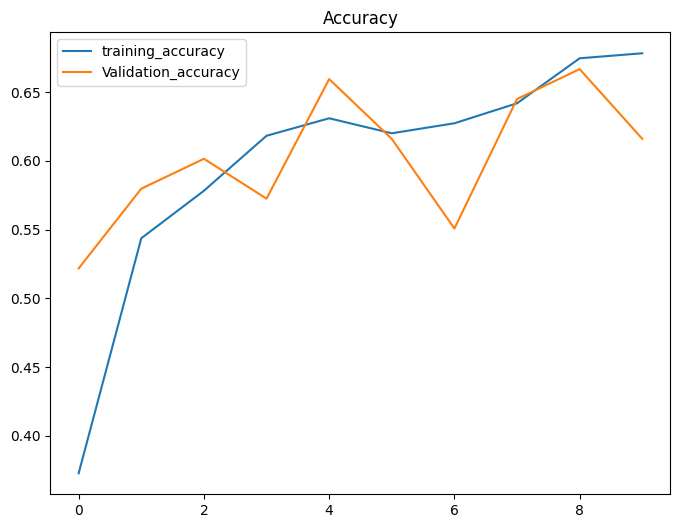

In [39]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(
train_generator,
steps_per_epoch=len(train_generator),
epochs=10,
validation_data=val_generator,
validation_steps=len(val_generator)
)
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.legend()
plt.title('Accuracy')

In [41]:
#since banner iD : 916462811 ends with 1 we perform (a)) Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7 for the convolution layer (i) with all
# other parameters unchanged

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 124, 124, 8)       608       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                492048    
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 68        
Total params: 492,724
Trainable params: 492,724
Non-trainable params: 0
_________________________________________________________________
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 5 steps
Epoch 1/10
18/18 [=====

Text(0.5, 1.0, 'Accuracy')

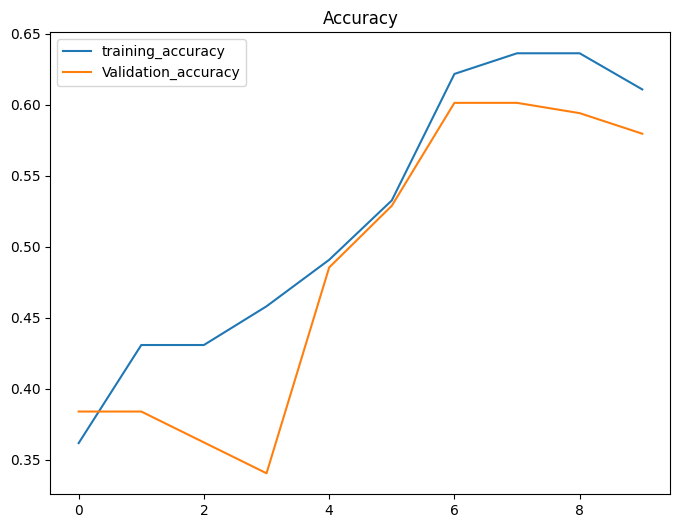

In [44]:
model2 = Sequential([
    Conv2D(filters=8,kernel_size=5,activation='relu',input_shape = (128,128,3)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16,activation='relu'),
    Dense(4,activation = 'softmax')
])
model2.summary()
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(
train_generator,
steps_per_epoch=len(train_generator),
epochs=10,
validation_data=val_generator,
validation_steps=len(val_generator)
)
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.legend()
plt.title('Accuracy')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 122, 122, 8)       1184      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 29768)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                476304    
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 68        
Total params: 477,556
Trainable params: 477,556
Non-trainable params: 0
_________________________________________________________________
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 5 steps
Epoch 1/10
18/18 [=====

Text(0.5, 1.0, 'Accuracy')

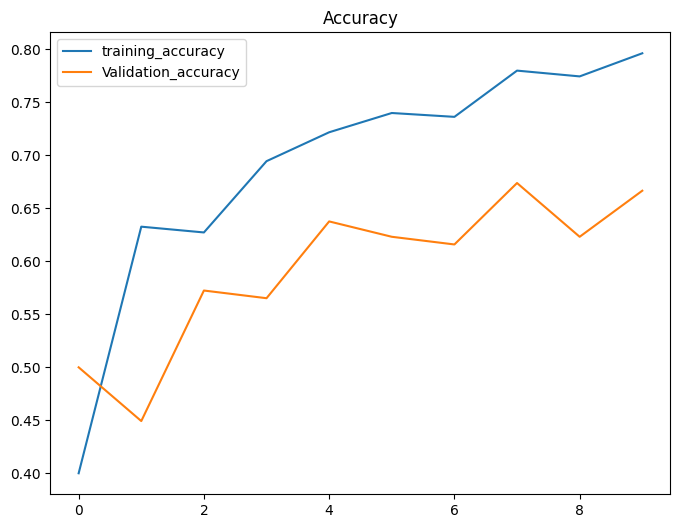

In [45]:
model3 = Sequential([
    Conv2D(filters=8,kernel_size=7,activation='relu',input_shape = (128,128,3)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(16,activation='relu'),
    Dense(4,activation = 'softmax')
])
model3.summary()
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model3.fit(
train_generator,
steps_per_epoch=len(train_generator),
epochs=10,
validation_data=val_generator,
validation_steps=len(val_generator)
)
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='Validation_accuracy')
plt.legend()
plt.title('Accuracy')